In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
x = data.iloc[:, :-1]
y= data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)

In [11]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver="liblinear")
cls.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
y_pred = cls.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [29]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
229,0,117,80,31,53,45.2,0.089,24
235,4,171,72,0,0,43.6,0.479,26
750,4,136,70,0,0,31.2,1.182,22
365,5,99,54,28,83,34.0,0.499,30
449,0,120,74,18,63,30.5,0.285,26
...,...,...,...,...,...,...,...,...
154,8,188,78,0,0,47.9,0.137,43
69,4,146,85,27,100,28.9,0.189,27
561,0,198,66,32,274,41.3,0.502,28
37,9,102,76,37,0,32.9,0.665,46


In [32]:
print(cls.predict([[2,170,77,30,50,25,0.77,30]]))

[1]


C:\Users\lokanath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [13]:
comp = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
comp[:]


,actual,predicted
229,0,0
235,1,1
750,1,1
365,0,0
449,0,0
...,...,...
154,1,1
69,0,0
561,1,1
37,1,0


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8051948051948052


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  8],
       [22, 33]], dtype=int64)

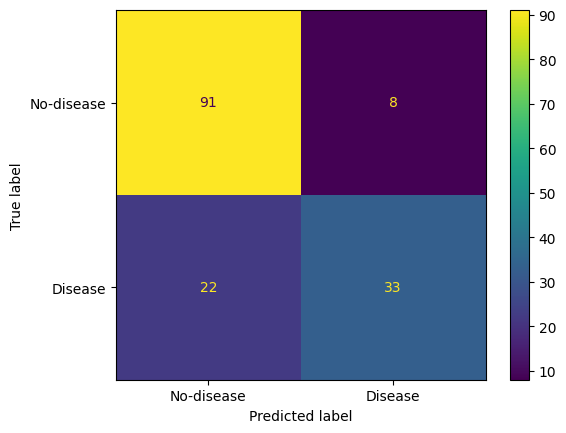

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No-disease', "Disease"])
cm_disp.plot()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.80      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



In [18]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8048780487804879

In [19]:
import joblib

In [20]:
joblib.dump?

In [22]:
joblib.dump(cls, 'logistic_regg_model' )

['logistic_regg_model']

In [24]:
model = joblib.load('./logistic_regg_model')

LogisticRegression(solver='liblinear')